In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
class IaF:
    def __init__(self, C=1, g_l=0.1, E_l=-65, Vr=-65, Vt=-40, g_s=0, E_s=0, dt=1):
        self.C = C
        self.g_l = g_l
        self.E_l = E_l
        self.Vt = Vt
        self.Vr = Vr
        self.g_s = g_s
        self.E_s = E_s
        self.dt = dt

    def _update(self, V, I, g_s=None):
        g_s = g_s or self.g_s
        CdVdt = - self.g_l * (V - self.E_l) - g_s * (V - self.E_s) + I
        return V + CdVdt / self.C * self.dt
    
    def sim_constant(self, I, g_s, T):
        voltage = np.zeros(T)
        spikes = np.zeros(T)
        voltage[0] = self.Vr
        for i in range(1, T):
            voltage[i] = self._update(voltage[i-1], I, g_s)
            if voltage[i] >= self.Vt:
                spikes[i] = 1
                voltage[i] = self.Vr

        return voltage, spikes


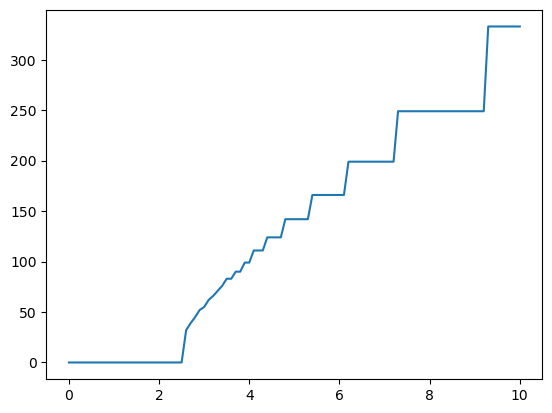

In [38]:
# F-I Curve of an integrate and fire neuron
iaf = IaF(dt = 1)

T = 1000
I = np.linspace(0, 10, 101)
voltage = []
spikes = []
firing_rate = []
for ii in I:
    v, s = iaf.sim_constant(ii, 0, T)
    voltage.append(v)
    spikes.append(s)
    firing_rate.append(np.sum(s) / T * 1000)

fig = plt.figure()
plt.plot(I, firing_rate)
plt.show()

(0.0, 50.0)

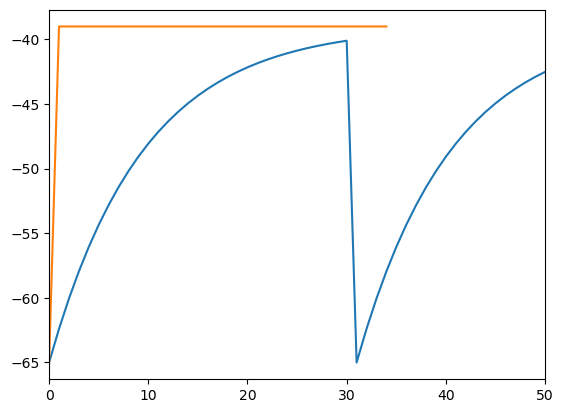

In [39]:
plt.plot(voltage[26])

t = np.arange(0, 35)
vt = (-65 - I[26]/iaf.g_l - iaf.E_l) * np.exp(-t / iaf.C / iaf.g_l) + I[26]/iaf.g_l + iaf.E_l

plt.plot(t, vt)
plt.xlim(0, 50)

In [67]:
N = 1000
J = np.random.normal(0, 1, (N, N))

evals = np.linalg.eigvals(J)
sevals = np.linalg.eigvalsh(J @ J.T)
sevals = sevals[::-1]

sv = np.linalg.svd(J, compute_uv=False)
svs = np.linalg.svd(J@J.T, compute_uv=False)

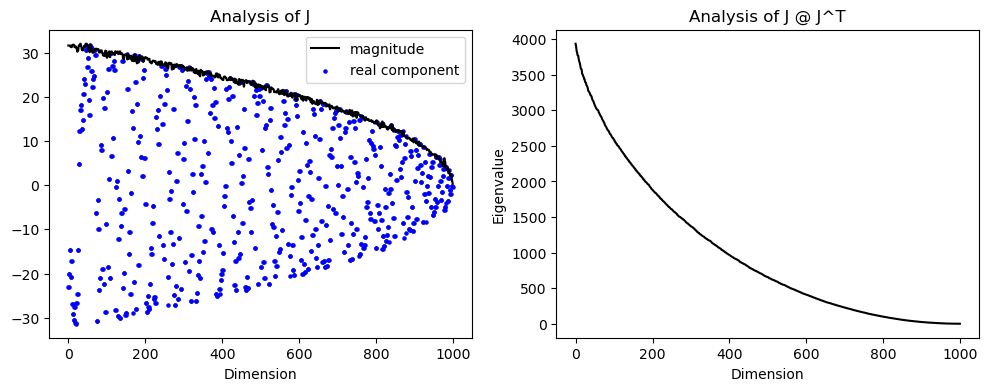

In [73]:
plt.close('all')
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(np.abs(evals), c='k', label="magnitude")
ax[0].scatter(np.arange(N), np.real(evals), c='b', s=5, label="real component")
ax[0].set_xlabel("Dimension")
ax[0].set_title("Analysis of J")
ax[0].legend()

ax[1].plot(sevals, c='k')
ax[1].set_xlabel("Dimension")
ax[1].set_ylabel("Eigenvalue")
ax[1].set_title("Analysis of J @ J^T")

plt.show()

100%|██████████| 1000/1000 [00:09<00:00, 107.80it/s]


ValueError: x and y must be the same size

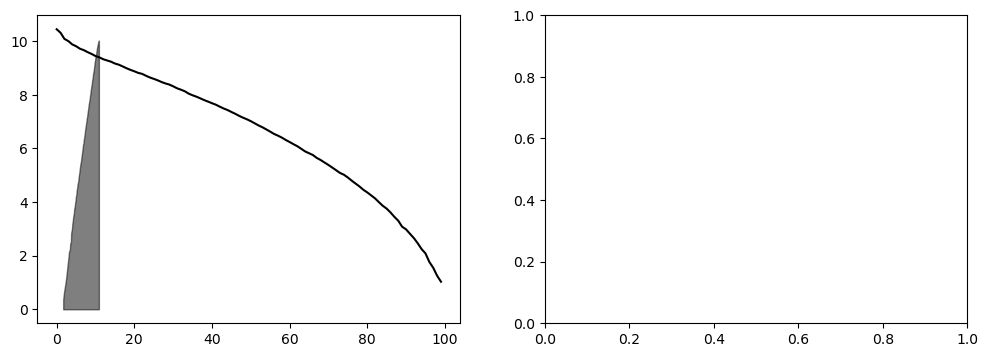

In [76]:
from tqdm import tqdm

D = 100
N = 1000
evals = []
sevals = []
for t in tqdm(range(N)):
    J = np.random.normal(0, 1, (D, D))
    evals.append(np.linalg.eigvals(J))
    sevals.append(np.linalg.eigvalsh(J @ J.T)[::-1])

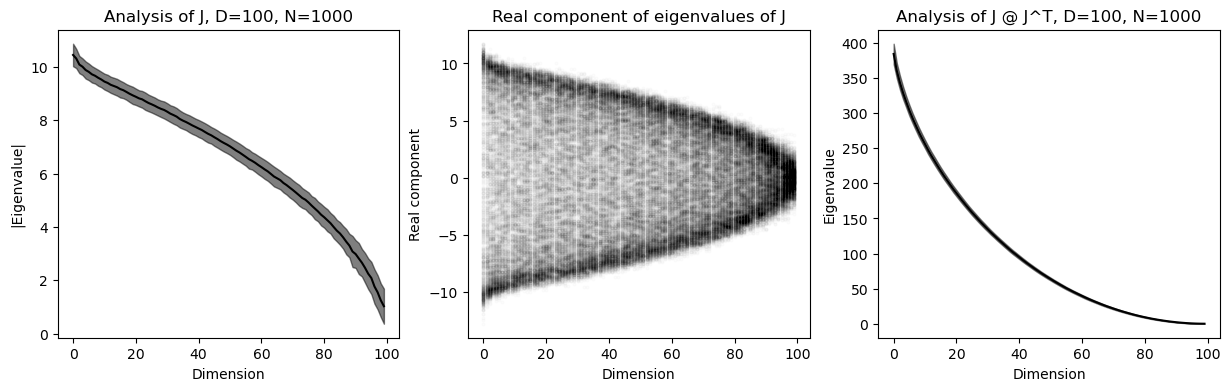

In [88]:

evals = np.array(evals)
sevals = np.array(sevals)

mn_evals = np.mean(np.abs(evals), axis=0)
std_evals = np.std(np.abs(evals), axis=0)

mn_sevals = np.mean(sevals, axis=0)
std_sevals = np.std(sevals, axis=0)

plt.close('all')
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].plot(range(D), mn_evals, c='k', label="magnitude")
ax[0].fill_between(range(D), mn_evals + std_evals, mn_evals - std_evals, alpha=0.5, color='k')
ax[0].set_xlabel("Dimension")
ax[0].set_ylabel("|Eigenvalue|")
ax[0].set_title(f"Analysis of J, D={D}, N={N}")

ax[1].scatter(np.tile(np.arange(D).reshape(1, -1), (N, 1)), np.real(evals), c='k', alpha=0.01, s=5, label="real component")
ax[1].set_xlabel("Dimension")
ax[1].set_ylabel("Real component")
ax[1].set_title("Real component of eigenvalues of J")

ax[2].plot(range(D), mn_sevals, c='k')
ax[2].fill_between(range(D), mn_sevals + std_sevals, mn_sevals - std_sevals, alpha=0.5, color='k')
ax[2].set_xlabel("Dimension")
ax[2].set_ylabel("Eigenvalue")
ax[2].set_title(f"Analysis of J @ J^T, D={D}, N={N}")

plt.show()

In [83]:
sevals.shape

(1000, 100)